In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import Data
data = pd.read_csv('Youtube_raw_data2.csv')
# data = data.iloc[:, 1:]     # Remove extra un-named column
data.head(15)

,Video Id,Title,Category
0,LXXkiUKDK4w,"Entertainment | Full Movie | Akshay Kumar, Tam...",Entertainment
1,g2wboV4sPfc,Entertainment 1x01 - Toma polla,Entertainment
2,m-H0uIH5HHQ,The Jam - That&#39;s Entertainment,Entertainment
3,ElcCJZyLjlA,Lesti - Mencintaimu Karena Allah | Official En...,Entertainment
4,ouJyesvlANE,ENTERTAINMENT- 2X01 &quot;Diffferent&quot;,Entertainment
5,C8CULyy7BhM,TEKA KUIH MUIH BERBUKA PUASA !!! COMEL JE SI D...,Entertainment
6,QPyDI091ImY,Entertainment 1x02 - La Mentira Del Túnel Antiguo,Entertainment
7,NaN,MBN Entertainment,Entertainment
8,C1KYRMqv_ZA,How Netflix And YouTube Changed Entertainment ...,Entertainment
9,yD_tIHOdxxY,മാഞ്ഞാളം Boys 🤨😂 - Spoof | Malayalam Vine | Ikru,Entertainment


# Data Preprocessing and Cleaning

## Missing Values

In [3]:
# Missing Values
num_missing_desc = data.isnull().sum()[2]    
print('Number of missing values: ' + str(num_missing_desc))
data = data.dropna()

Number of missing values: 231


## Text Cleaning

#### The cleaning of the text is performed in the various manner

In [4]:
data.head(15)

,Video Id,Title,Category
0,LXXkiUKDK4w,"Entertainment | Full Movie | Akshay Kumar, Tam...",Entertainment
1,g2wboV4sPfc,Entertainment 1x01 - Toma polla,Entertainment
2,m-H0uIH5HHQ,The Jam - That&#39;s Entertainment,Entertainment
3,ElcCJZyLjlA,Lesti - Mencintaimu Karena Allah | Official En...,Entertainment
4,ouJyesvlANE,ENTERTAINMENT- 2X01 &quot;Diffferent&quot;,Entertainment
5,C8CULyy7BhM,TEKA KUIH MUIH BERBUKA PUASA !!! COMEL JE SI D...,Entertainment
6,QPyDI091ImY,Entertainment 1x02 - La Mentira Del Túnel Antiguo,Entertainment
8,C1KYRMqv_ZA,How Netflix And YouTube Changed Entertainment ...,Entertainment
9,yD_tIHOdxxY,മാഞ്ഞാളം Boys 🤨😂 - Spoof | Malayalam Vine | Ikru,Entertainment
10,lDR0txplahk,TEKA CHEF SELEBRITI TERKENAL !!! RUPANYA MIMI ...,Entertainment


In [5]:
# Change to lowercase
data['Title'] = data['Title'].map(lambda x: x.lower())
# data['Description'] = data['Description'].map(lambda x: x.lower())?

# Remove numbers
data['Title'] = data['Title'].map(lambda x: re.sub(r'\d+', '', x))
# data['Description'] = data['Description'].map(lambda x: re.sub(r'\d+', '', x))

# Remove Punctuation
data['Title']  = data['Title'].map(lambda x: x.translate(x.maketrans('', '', string.punctuation)))
# data['Description']  = data['Description'].map(lambda x: x.translate(x.maketrans('', '', string.punctuation)))

# Remove white spaces
data['Title'] = data['Title'].map(lambda x: x.strip())
# data['Description'] = data['Description'].map(lambda x: x.strip())

# Tokenize into words
data['Title'] = data['Title'].map(lambda x: word_tokenize(x))
# data['Description'] = data['Description'].map(lambda x: word_tokenize(x))
 
# Remove non alphabetic tokens
data['Title'] = data['Title'].map(lambda x: [word for word in x if word.isalpha()])
# data['Description'] = data['Description'].map(lambda x: [word for word in x if word.isalpha()])
# filter out stop words
stop_words = set(stopwords.words('english'))
data['Title'] = data['Title'].map(lambda x: [w for w in x if not w in stop_words])
# data['Description'] = data['Description'].map(lambda x: [w for w in x if not w in stop_words])

# Word Lemmatization
lem = WordNetLemmatizer()
data['Title'] = data['Title'].map(lambda x: [lem.lemmatize(word,"v") for word in x])
# data['Description'] = data['Description'].map(lambda x: [lem.lemmatize(word,"v") for word in x])

# Turn lists back to string
data['Title'] = data['Title'].map(lambda x: ' '.join(x))
# data['Description'] = data['Description'].map(lambda x: ' '.join(x))

In [6]:
data.head(15)

,Video Id,Title,Category
0,LXXkiUKDK4w,entertainment full movie akshay kumar tamannaa...,Entertainment
1,g2wboV4sPfc,entertainment x toma polla,Entertainment
2,m-H0uIH5HHQ,jam thats entertainment,Entertainment
3,ElcCJZyLjlA,lesti mencintaimu karena allah official entert...,Entertainment
4,ouJyesvlANE,entertainment x quotdiffferentquot,Entertainment
5,C8CULyy7BhM,teka kuih muih berbuka puasa comel je si dia a...,Entertainment
6,QPyDI091ImY,entertainment x la mentira del túnel antiguo,Entertainment
8,C1KYRMqv_ZA,netflix youtube change entertainment forever c...,Entertainment
9,yD_tIHOdxxY,boys spoof malayalam vine ikru,Entertainment
10,lDR0txplahk,teka chef selebriti terkenal rupanya mimi juar...,Entertainment


## Data Preprocessing

### Label Encoding classes

In [7]:
# Encode classes
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(data.Category)
data.Category = le.transform(data.Category)
data.head(5)

,Video Id,Title,Category
0,LXXkiUKDK4w,entertainment full movie akshay kumar tamannaa...,1
1,g2wboV4sPfc,entertainment x toma polla,1
2,m-H0uIH5HHQ,jam thats entertainment,1
3,ElcCJZyLjlA,lesti mencintaimu karena allah official entert...,1
4,ouJyesvlANE,entertainment x quotdiffferentquot,1


### TF-IDF Text Vectorization

In [8]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_title = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
# tfidf_desc = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
labels = data.Category
features_title = tfidf_title.fit_transform(data.Title).toarray()
# features_description = tfidf_desc.fit_transform(data.Description).toarray()
print('Title Features Shape: ' + str(features_title.shape))

Title Features Shape: (3476, 1574)


### Data Analysis and Feature Exploration

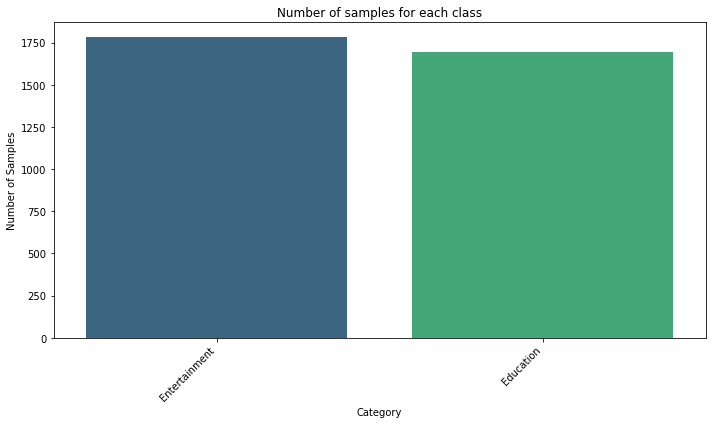

In [9]:
category_mapping = {
    0: 'Education',
    1: 'Entertainment',
}

# Replace numeric category names with word representations
data['Category'] = data['Category'].map(category_mapping)

# Plotting class distribution with different colors for each category
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Category', order=data['Category'].value_counts().index, palette='viridis')
plt.title('Number of samples for each class')
plt.xlabel('Category')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

### Now let us see if the features are correctly extracted from the text data by checking the most important features for each class 

In [10]:
# Best 5 keywords for each class using Title Feaures
from sklearn.feature_selection import chi2
import numpy as np
N = 5
for current_class in list(le.classes_):
    current_class_id = le.transform([current_class])[0]
    features_chi2 = chi2(features_title, labels == current_class_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf_title.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(current_class))
    print("Most correlated unigrams:")
    print('-' *30)
    print('. {}'.format('\n. '.join(unigrams[-N:])))
    print("Most correlated bigrams:")
    print('-' *30)
    print('. {}'.format('\n. '.join(bigrams[-N:])))
    print("\n")

# 'Education':
Most correlated unigrams:
------------------------------
. learn
. mathematics
. math
. entertainment
. entertaiment
Most correlated bigrams:
------------------------------
. news pt
. entertaiment news
. short entertaiment
. entertaiment short
. math antic


# 'Entertainment':
Most correlated unigrams:
------------------------------
. learn
. mathematics
. math
. entertainment
. entertaiment
Most correlated bigrams:
------------------------------
. news pt
. entertaiment news
. short entertaiment
. entertaiment short
. math antic




## Modeling and Training

### The features from both the title and description are extracted separately, and then combined to create a final feature matrix.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import linear_model
from sklearn.ensemble import AdaBoostClassifier

X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:3], data['Category'],test_size=0.2, random_state = 0)
X_train_title_features = tfidf_title.transform(X_train['Title']).toarray()
# X_train_desc_features = tfidf_desc.transform(X_train['Description']).toarray()
features = np.concatenate([X_train_title_features], axis=1)

In [12]:
X_train.head()

,Title,Category
2576,mathematics,Education
686,abtube ሩታ እና ፍቅር ተደባደቡ አብርሽ ጉድ ሆነ,Entertainment
2559,become math genius people see math problem mat...,Education
2328,one line oldest math text hint hide universes,Education
3425,lec mit j mathematics computer science fall,Education


In [13]:
y_train.head()

2576        Education
686     Entertainment
2559        Education
2328        Education
3425        Education
Name: Category, dtype: object

In [14]:
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.utils.np_utils import to_categorical
from keras.utils import pad_sequences


# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 20000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 50
# This is fixed.
EMBEDDING_DIM = 100

# Combining titles and descriptions into a single sentence
titles = data['Title'].values
# descriptions = data['Description'].values
data_for_lstms = []
for i in range(len(titles)):
    temp_list = [titles[i]]
    data_for_lstms.append(' '.join(temp_list))

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(data_for_lstms)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

# Convert the data to padded sequences
X = tokenizer.texts_to_sequences(data_for_lstms)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

# One-hot Encode labels
Y = pd.get_dummies(data['Category']).values
print('Shape of label tensor:', Y.shape)

# Splitting into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state = 42)

Found 4272 unique tokens.
Shape of data tensor: (3476, 50)
Shape of label tensor: (3476, 2)


In [15]:
# Define LSTM Model
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 100)           2000000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 50, 100)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 2)                 202       
                                                                 
Total params: 2,080,602
Trainable params: 2,080,602
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
# Training LSTM Model
epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1)

Epoch 1/5
37/37 [==============================] - 7s 114ms/step - loss: 0.5900 - accuracy: 0.7460 - val_loss: 0.3480 - val_accuracy: 0.9042
Epoch 2/5
37/37 [==============================] - 4s 105ms/step - loss: 0.2823 - accuracy: 0.8986 - val_loss: 0.2789 - val_accuracy: 0.9042
Epoch 3/5
37/37 [==============================] - 4s 95ms/step - loss: 0.2100 - accuracy: 0.9237 - val_loss: 0.2730 - val_accuracy: 0.9119
Epoch 4/5
37/37 [==============================] - 4s 95ms/step - loss: 0.1666 - accuracy: 0.9399 - val_loss: 0.2871 - val_accuracy: 0.9234
Epoch 5/5
37/37 [==============================] - 3s 93ms/step - loss: 0.1398 - accuracy: 0.9450 - val_loss: 0.3070 - val_accuracy: 0.9080


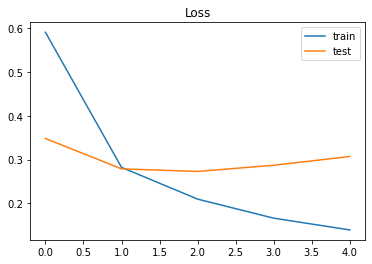

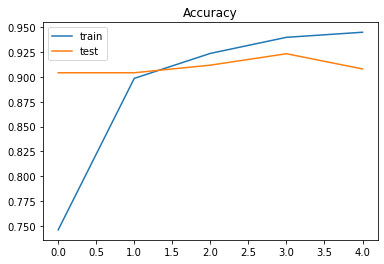

In [18]:
# Plot Loss
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# Plot Accuracy
accuracy_key = 'accuracy' if 'accuracy' in history.history else 'acc'
plt.title('Accuracy')
plt.plot(history.history[accuracy_key], label='train')
plt.plot(history.history['val_' + accuracy_key], label='test')
plt.legend()
plt.show()


## Performance Evaluation

### LSTM

28/28 [==============================] - 0s 9ms/step
               precision    recall  f1-score   support

    Education       0.88      0.94      0.91       407
Entertainment       0.94      0.89      0.92       462

     accuracy                           0.91       869
    macro avg       0.91      0.92      0.91       869
 weighted avg       0.92      0.91      0.91       869



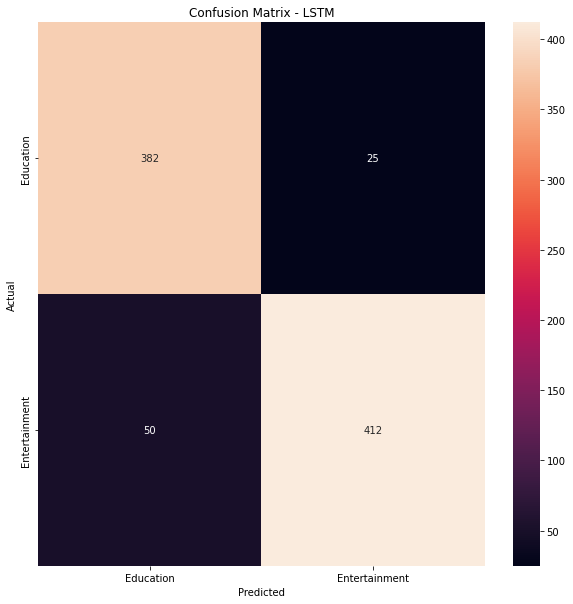

C:\Users\Raju Ranjan Yadav\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


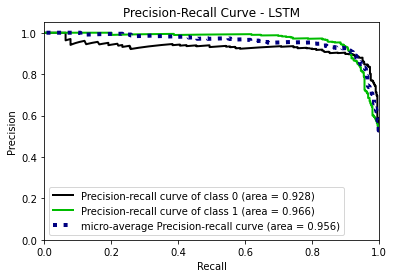

In [19]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import scikitplot as skplt

# # Ensure X_test contains text data in the 'Title' and 'Description' columns
# X_test_title_features = tfidf_title.transform(X_test['Title']).toarray()
# X_test_desc_features = tfidf_desc.transform(X_test['Description']).toarray()
y_probas = model.predict(X_test)
y_pred = np.argmax(y_probas, axis=1)
y_test = np.argmax(Y_test, axis=1)

print(metrics.classification_report(y_test, y_pred, 
                                    target_names=list(le.classes_)))

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=list(le.classes_), yticklabels=list(le.classes_))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - LSTM')
plt.show()

skplt.metrics.plot_precision_recall_curve(y_test, y_probas)
plt.title('Precision-Recall Curve - LSTM')
plt.show()


In [20]:
import pickle

In [21]:
model_directory = 'saved_models/model.h5'
model.save(model_directory)

In [22]:
from keras.preprocessing.text import Tokenizer
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)